# Team 5 - Global Terrorism

![](https://www.start.umd.edu/gtd/images/START_GlobalTerrorismDatabase_TerroristAttacksConcentrationIntensityMap_45Years.png)

_For more information about the dataset, read [here](https://www.kaggle.com/START-UMD/gtd)._

## Your tasks
- Name your team!
- Read the source and do some quick research to understand more about the dataset and its topic
- Clean the data
- Perform Exploratory Data Analysis on the dataset
- Analyze the data more deeply and extract insights
- Visualize your analysis on Google Data Studio
- Present your works in front of the class and guests next Monday

## Submission Guide
- Create a Github repository for your project
- Upload the dataset (.csv file) and the Jupyter Notebook to your Github repository. In the Jupyter Notebook, **include the link to your Google Data Studio report**.
- Submit your works through this [Google Form](https://forms.gle/oxtXpGfS8JapVj3V8).

## Tips for Data Cleaning, Manipulation & Visualization
- Here are some of our tips for Data Cleaning, Manipulation & Visualization. [Click here](https://hackmd.io/cBNV7E6TT2WMliQC-GTw1A)

_____________________________

## Some Hints for This Dataset:
- Use `encoding ='ISO-8859-1'` when reading the .csv file
- There are many columns that are not really helpful for us. Can you identify and drop them?
- Can you draw a map of terrorism event locations?
- And more...

In [49]:
# Since we store our data in google drive, let's mount drive and access it
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
# ValueError: cannot set WRITEABLE flag to True of this array

# This error appear if we try to read from hdf , seems like incompatible version
!pip install numpy==1.15.0
# Latest plotly allow subplot, subplot error with current version 3.6 default in colab
!pip install plotly==4.1.0

In [0]:
# Hope downgrade numpy worth
# Well here we go again, let's run all previous cell
# Since i already delete all previous cell 
# Because it's a pain to run everything again and got stuck to error cell
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")

# file_path = '/content/drive/My Drive/terrorism.csv'
# gbtm_data = pd.read_csv(file_path, encoding ='ISO-8859-1')

# gbtm_data.to_hdf('/content/drive/My Drive/terrorism.h5', 'data')
gbtm_data_hdf = pd.read_hdf('/content/drive/My Drive/terrorism.h5')

In [52]:
# Seems like no more problem, hope downgrade numpy is worth it
gbtm_data_hdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 188.5+ MB


In [53]:
gbtm_data_hdf.describe()

eventid          iyear  ...       INT_MISC        INT_ANY
count  1.816910e+05  181691.000000  ...  181691.000000  181691.000000
mean   2.002705e+11    2002.638997  ...       0.090010      -3.945952
std    1.325957e+09      13.259430  ...       0.568457       4.691325
min    1.970000e+11    1970.000000  ...      -9.000000      -9.000000
25%    1.991021e+11    1991.000000  ...       0.000000      -9.000000
50%    2.009022e+11    2009.000000  ...       0.000000       0.000000
75%    2.014081e+11    2014.000000  ...       0.000000       0.000000
max    2.017123e+11    2017.000000  ...       1.000000       1.000000

[8 rows x 77 columns]

In [54]:
# Let's see how many NAN we have
gbtm_data_hdf.isna().sum()

eventid                    0
iyear                      0
imonth                     0
iday                       0
approxdate            172452
extended                   0
resolution            179471
country                    0
country_txt                0
region                     0
region_txt                 0
provstate                421
city                     434
latitude                4556
longitude               4557
specificity                6
vicinity                   0
location              126196
summary                66129
crit1                      0
crit2                      0
crit3                      0
doubtterr                  1
alternative           152680
alternative_txt       152680
multiple                   1
success                    0
suicide                    0
attacktype1                0
attacktype1_txt            0
                       ...  
propextent            117626
propextent_txt        117626
propvalue             142702
propcomment   

In [55]:
# Oh, holy, missing a damn lot!!! clean this dataset??? 
# Drop na will significantly affect the result to the point of having no data at all
# Fill na??? with what value???
# Well let's just say the best approach for now is to let the dataset as it be
# Maybe stick with exploring a bit longer
gbtm_data_hdf.shape

(181691, 135)

In [56]:

print([col for col in gbtm_data_hdf.columns])


['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended', 'resolution', 'country', 'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude', 'longitude', 'specificity', 'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3', 'doubtterr', 'alternative', 'alternative_txt', 'multiple', 'success', 'suicide', 'attacktype1', 'attacktype1_txt', 'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt', 'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2', 'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3', 'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2', 'guncertain3', 'individual', 'nperps', 'nperpcap', 'claimed', 'claimmode', 'claimmode_txt', 'claim2', 'claimmode2', 'claim

In [57]:
# Well sht, can't make head or tail with this dataset, better to take a look at the dataset description
# link: https://www.start.umd.edu/gtd/downloads/Codebook.pdf
# We are interested in weapon, attack type, region occured
gbtm_data_hdf[["attacktype1", "attacktype1_txt"]].drop_duplicates().sort_values(by='attacktype1')
# The information of attack type code and text can be read in the link.
# However, for those do not have much time to read, better show the result here

attacktype1                      attacktype1_txt
0              1                        Assassination
5              2                        Armed Assault
3              3                    Bombing/Explosion
12             4                            Hijacking
336            5  Hostage Taking (Barricade Incident)
1              6          Hostage Taking (Kidnapping)
4              7       Facility/Infrastructure Attack
298            8                      Unarmed Assault
16             9                              Unknown

In [58]:
# Let's see what kind of attack occur the most
gbtm_data_hdf['attacktype1_txt'].value_counts()

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: attacktype1_txt, dtype: int64

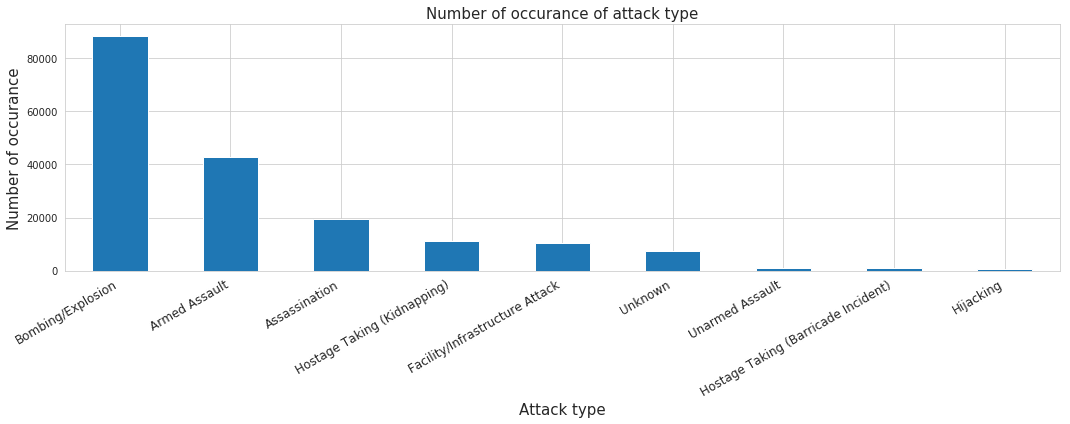

In [59]:
# Well, that should be enough to know what type is most prefered
# Still let's just go having graph to better present it

color = sns.color_palette()
ax = gbtm_data_hdf['attacktype1_txt'].value_counts().plot('bar',color=color[0],figsize=(15,6))
ax.set_xlabel('Attack type',fontsize=15)
ax.set_ylabel('Number of occurance',fontsize=15)
ax.set_title('Number of occurance of attack type',fontsize=15)
ax.set_xticklabels(('Bombing/Explosion', 'Armed Assault', 'Assassination',
                    'Hostage Taking (Kidnapping)', 'Facility/Infrastructure Attack',
                    'Unknown', 'Unarmed Assault', 'Hostage Taking (Barricade Incident)',
                    'Hijacking'), rotation='horizontal', fontsize=12)
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.tight_layout()
plt.show()

In [60]:
gbtm_data_hdf[["region", "region_txt"]].drop_duplicates().sort_values(by='region')

region                   region_txt
1           1                North America
0           2  Central America & Caribbean
6           3                South America
4           4                    East Asia
2           5               Southeast Asia
585         6                   South Asia
47639       7                 Central Asia
3           8               Western Europe
15          9               Eastern Europe
95         10   Middle East & North Africa
16         11           Sub-Saharan Africa
565        12        Australasia & Oceania

In [61]:
# Let's see what region terrorists focus the most
gbtm_data_hdf['region_txt'].value_counts()

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: region_txt, dtype: int64

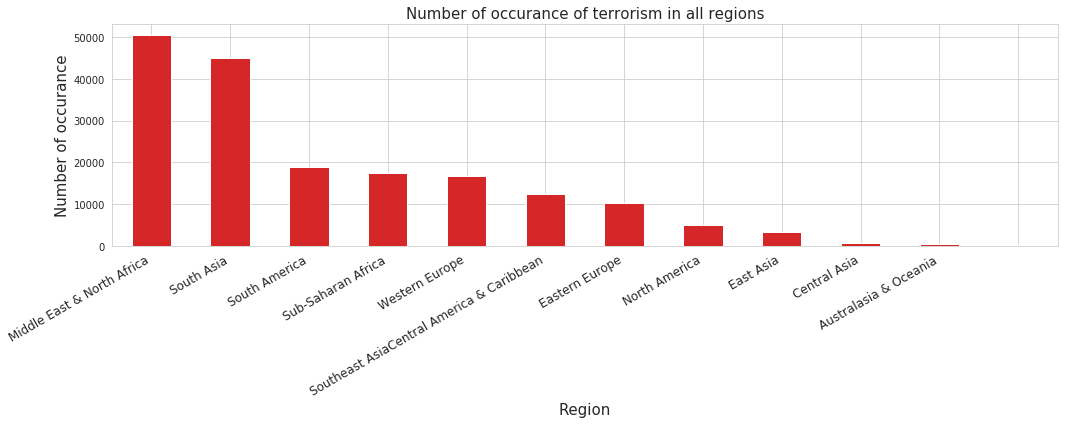

In [62]:
ax = gbtm_data_hdf['region_txt'].value_counts().plot('bar',color=color[3],figsize=(15,6))
ax.set_xlabel('Region',fontsize=15)
ax.set_ylabel('Number of occurance',fontsize=15)
ax.set_title('Number of occurance of terrorism in all regions',fontsize=15)
ax.set_xticklabels(('Middle East & North Africa', 'South Asia', 'South America',
                    'Sub-Saharan Africa', 'Western Europe', 'Southeast Asia'
                    'Central America & Caribbean', 'Eastern Europe',
                    'North America', 'East Asia', 'Central Asia', 
                    'Australasia & Oceania'), rotation='horizontal', fontsize=12)
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.tight_layout()
plt.show()

In [63]:
gbtm_data_hdf[['weaptype1', 'weaptype1_txt']].drop_duplicates().sort_values(by = 'weaptype1')

weaptype1                                      weaptype1_txt
14520          1                                         Biological
116            2                                           Chemical
2342           3                                       Radiological
5              5                                           Firearms
3              6                                         Explosives
1325           7                                       Fake Weapons
4              8                                         Incendiary
298            9                                              Melee
585           10  Vehicle (not to include vehicle-borne explosiv...
314           11                                 Sabotage Equipment
3691          12                                              Other
0             13                                            Unknown

In [64]:
gbtm_data_hdf['weaptype1_txt'].value_counts()

Explosives                                                                     92426
Firearms                                                                       58524
Unknown                                                                        15157
Incendiary                                                                     11135
Melee                                                                           3655
Chemical                                                                         321
Sabotage Equipment                                                               141
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      136
Other                                                                            114
Biological                                                                        35
Fake Weapons                                                                      33
Radiological                                                     

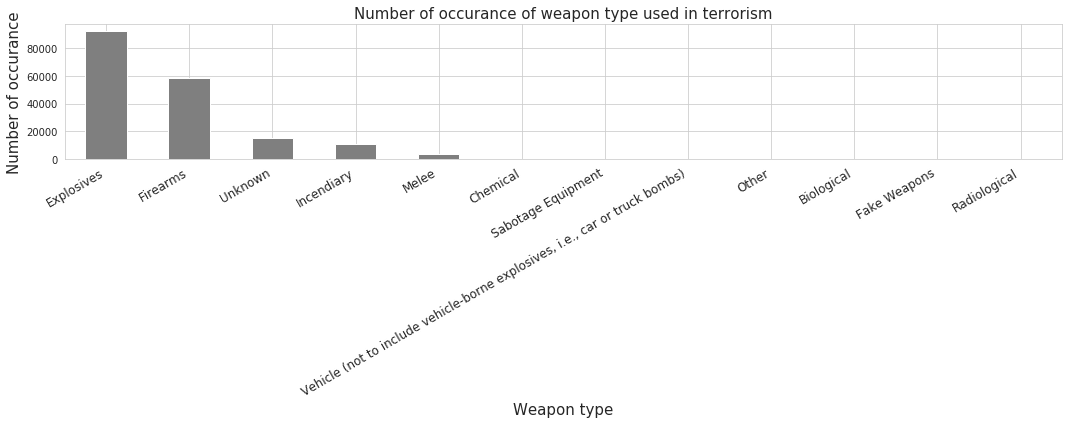

In [65]:
ax = gbtm_data_hdf['weaptype1_txt'].value_counts().plot('bar',color=color[7],figsize=(15,6))
ax.set_xlabel('Weapon type',fontsize=15)
ax.set_ylabel('Number of occurance',fontsize=15)
ax.set_title('Number of occurance of weapon type used in terrorism',fontsize=15)
ax.set_xticklabels(('Explosives', 'Firearms', 'Unknown',
                    'Incendiary', 'Melee', 'Chemical', 'Sabotage Equipment',
                    'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)',
                    'Other', 'Biological', 'Fake Weapons', 
                    'Radiological'), rotation='horizontal', fontsize=12)
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.tight_layout()
plt.show()

In [66]:
# Explosives is the most prefered weapons, maybe because it bring great destruction power
# This may related to number of victim kills and wounds
# Let's find out
casualties_weapon_data = gbtm_data_hdf[['nkill', 'nwound','attacktype1','attacktype1_txt']]
casualties_weapon_data.isna().sum()

nkill              10313
nwound             16311
attacktype1            0
attacktype1_txt        0
dtype: int64

In [0]:
# Well compare to around 180000 records, the number could be said to be relative small
# It's much better if we could fill these missing data
# However, these 2 fields require accurate data which we can not hope to collect and fill
# Better drop all these values
casualties_weapon_data_nona = casualties_weapon_data.dropna()

In [68]:
# check again
casualties_weapon_data_nona.isna().sum()

nkill              0
nwound             0
attacktype1        0
attacktype1_txt    0
dtype: int64

In [69]:
# Let's make a pivot table which will summarize number of casualties based on attack types
casualties_weapon_kill_summarize = casualties_weapon_data_nona.pivot_table(columns='attacktype1_txt', values='nkill', aggfunc='sum')
casualties_weapon_kill_summarize

attacktype1_txt  Armed Assault  Assassination  ...  Unarmed Assault  Unknown
nkill                 135393.0        23355.0  ...            796.0  25354.0

[1 rows x 9 columns]

In [70]:
casualties_weapon_wound_summarize = casualties_weapon_data_nona.pivot_table(columns='attacktype1_txt', values='nwound', aggfunc='sum')
casualties_weapon_wound_summarize

attacktype1_txt  Armed Assault  Assassination  ...  Unarmed Assault  Unknown
nwound                 76993.0        13854.0  ...          13995.0  14252.0

[1 rows x 9 columns]

In [0]:
# Let's make piechart for easier view on the statistic
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [72]:
labels = casualties_weapon_wound_summarize.columns
kill_values = casualties_weapon_kill_summarize.to_numpy()
wound_values = casualties_weapon_wound_summarize.to_numpy()

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=labels, values=kill_values[0], name="Type of attacks cause death"),
              1, 1)
fig.add_trace(go.Pie(labels=labels, values=wound_values[0], name="Type of attacks cause wound"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Global Terrorism ",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Death', x=0.16, y=0.5, font_size=20, showarrow=False),
                 dict(text='Wound', x=0.85, y=0.5, font_size=20, showarrow=False)])
fig.show()

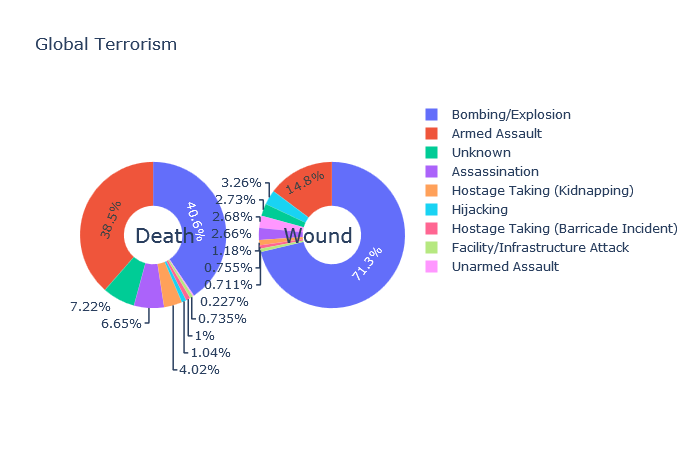

In [73]:
# Since plotly using js to display images
# Github only display static web, so with dynamic either we have to go around add some dependencies
# Or just simply download static images and then upload it
from IPython.display import Image
Image('/content/drive/My Drive/newplot.png', width=900, height=600)

In [0]:
# We can see that both armed assault and bombing explosion make up for most of the casualties
# This must be why terrorist prefered these attack types
# One more reason is because it is easier to get their hands on these with reasonable price

In [75]:
# Upon taking close inspection on dataset, we can see some interesting field:
# number of fatalities vs number of fatalities in US
# number of non-fatalities vs number of non-fatalities in US
# Why having specific numerical value for US?
# Maybe the dataset collected by US or having some interesting facts
# Let's compare the 2
gbtm_data_hdf['nkillus'].count()/gbtm_data_hdf['nkill'].count()

0.6841309853073323

In [76]:
gbtm_data_hdf['nwoundus'].count()/gbtm_data_hdf['nwound'].count()

0.7073950900955376

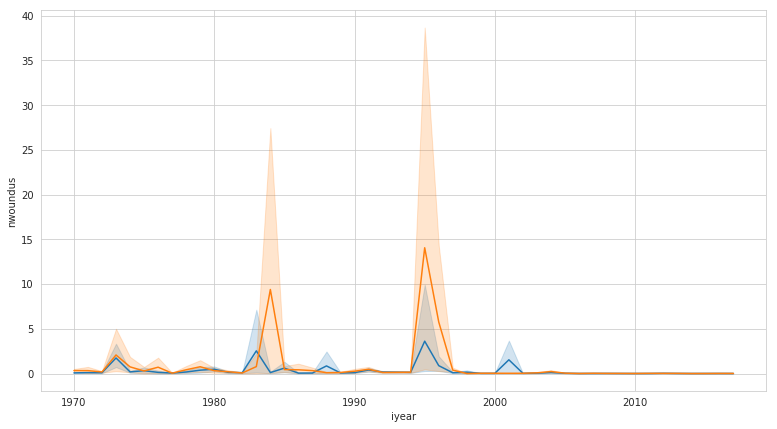

In [77]:
# Ugh seems like the occurance of fatalities and non-fatalities of US people in all terrorism activity is very high
plt.figure(figsize=(13,7))
sns.lineplot(x='iyear', y='nkillus', data=gbtm_data_hdf)
sns.lineplot(x='iyear', y='nwoundus', data=gbtm_data_hdf)

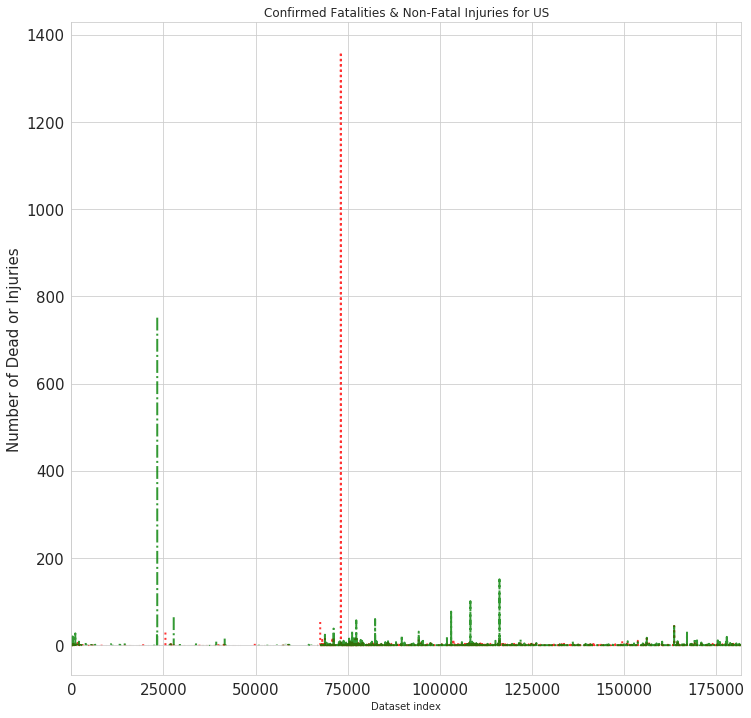

In [78]:
# Ugh nice line plot, but quite small and the number seems like average group by year
# Multiple line plot seems impossible with seaborn so let's get back to plt

gbtm_data_hdf['nkillus'].plot(kind = 'line', color = 'red', 
                           label = 'The Number of Total Confirmed Fatalities for US', 
                           linewidth = 2, alpha = 0.8, grid = True, 
                           linestyle = ':', figsize = (12,12), fontsize=15)

gbtm_data_hdf['nwoundus'].plot(kind = 'line', color = "green", 
                            label = 'The Number of Confirmed Non-Fatal Injuries for US', 
                            linewidth = 2, alpha = 0.8, grid = True, 
                            linestyle = '-.', figsize = (12,12), fontsize=15)
    
plt.xlabel('Dataset index', fontsize=10)              
plt.ylabel('Number of Dead or Injuries', fontsize=15)
plt.title('Confirmed Fatalities & Non-Fatal Injuries for US')
plt.show()

# The table is sorted by years, and is missing value in 1993
# There exist a year where the number of victims getting killed skyrocketted


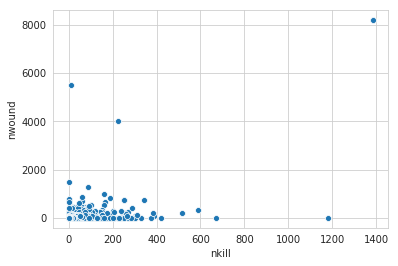

In [79]:
# Death and Injuries of all time
sns.scatterplot(x="nkill", y="nwound", data=gbtm_data_hdf)

In [80]:
# Let's valuate number of people killed and wounded in corresponding to country
casualties_country_data = gbtm_data_hdf[['nkill', 'nwound','country','country_txt']]
casualties_country_data.isna().sum()

nkill          10313
nwound         16311
country            0
country_txt        0
dtype: int64

In [81]:
casualties_country_data_nona = casualties_country_data.dropna()
casualties_country_data_nona.isna().sum()

nkill          0
nwound         0
country        0
country_txt    0
dtype: int64

In [82]:
casualties_country_kill_summarize = casualties_country_data_nona.pivot_table(columns='country_txt', values='nkill', aggfunc='sum')
casualties_country_kill_summarize

country_txt  Afghanistan  Albania  Algeria  ...  Zaire  Zambia  Zimbabwe
nkill            36014.0     42.0  10147.0  ...  296.0    70.0     154.0

[1 rows x 202 columns]

In [83]:
casualties_country_wound_summarize = casualties_country_data_nona.pivot_table(columns='country_txt', values='nwound', aggfunc='sum')
casualties_country_wound_summarize

country_txt  Afghanistan  Albania  Algeria  ...  Zaire  Zambia  Zimbabwe
nwound           44199.0    126.0   9149.0  ...  211.0    62.0     222.0

[1 rows x 202 columns]

In [84]:
labels = casualties_country_wound_summarize.columns
kill_values = casualties_country_kill_summarize.to_numpy()
wound_values = casualties_country_wound_summarize.to_numpy()

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=labels, values=kill_values[0], name="Death in countries"),
              1, 1)
fig.add_trace(go.Pie(labels=labels, values=wound_values[0], name="Wound in countries"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Global Terrorism ",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Death', x=0.16, y=0.5, font_size=20, showarrow=False),
                 dict(text='Wound', x=0.85, y=0.5, font_size=20, showarrow=False)])
fig.show()

# Ugh quite a mess because have a lot of columns
# Using bar plot but have a lot of rows
# So guess what? Maybe lets just stick with pie chart
# Terrorist acts in the Middle East and northern Africa have been seen to have fatal consequences

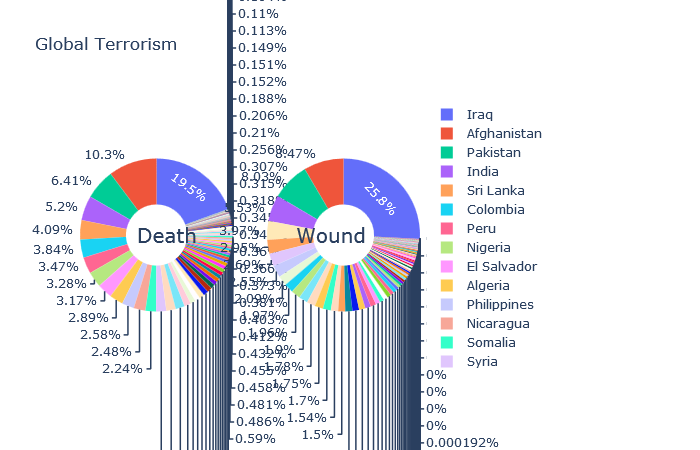

In [85]:
Image('/content/drive/My Drive/newplot_1.png', width = 900, height = 600)

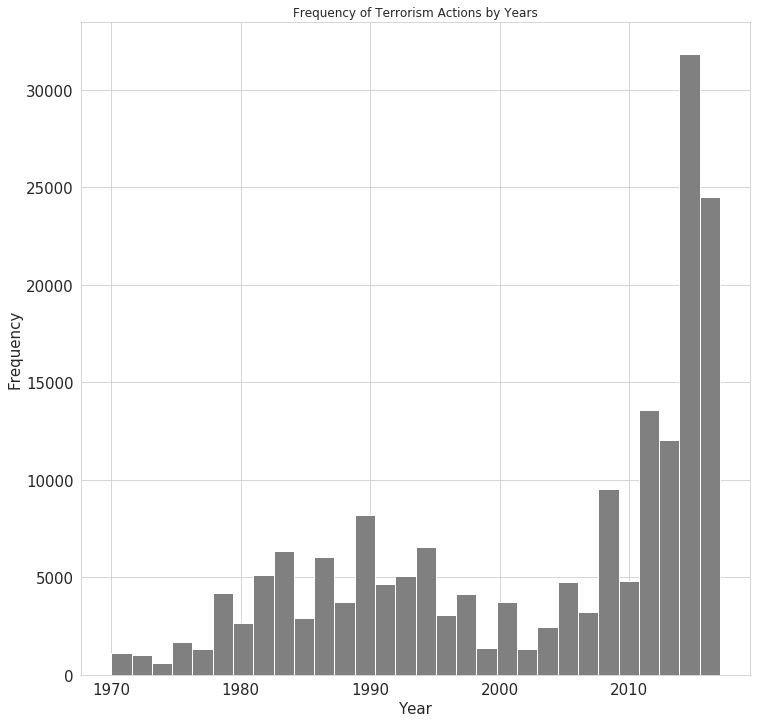

In [86]:
# Frequency of terrorism


# Histogram plot
# bins = number of bar in figure
gbtm_data_hdf['iyear'].plot(kind = 'hist', bins = 30, figsize = (12,12), color = 'gray', fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('Frequency of Terrorism Actions by Years')
plt.show()



In [0]:
# Hm, the graph is missing a lot of years, maybe we can make a more detail graph
# Let's create new dataset with only a few fields we interest in
gbtm_data_hdf
detailed_report=gbtm_data_hdf[['eventid','iyear',
                 'provstate', 'latitude', 
                 'longitude',
                 'targtype1_txt', 'gname',  
                 'nkill', 'nwound']]

In [0]:
detailed_report.dropna(inplace=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]),
 <a list of 47 Text xticklabel objects>)

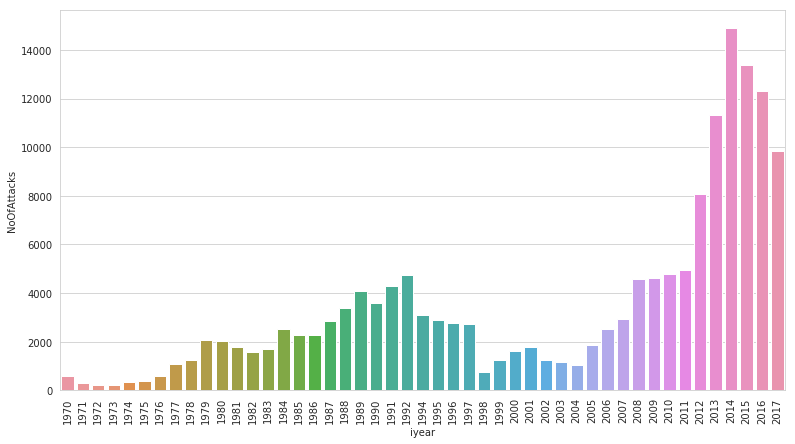

In [89]:
plt.figure(figsize=(13,7))
detailed_year_summarize=detailed_report['iyear'].value_counts().\
to_frame().reset_index().rename(columns={'index':'iyear','iyear':'NoOfAttacks'}).sort_values(by='iyear')
sns.barplot(data=detailed_year_summarize,x='iyear',y='NoOfAttacks',)
plt.xticks(rotation=90)

In [90]:
fig = go.Figure()
fig.add_trace(go.Scattermapbox(
    lat= detailed_report['latitude'],
    lon= detailed_report['longitude'],
    # customdata = detailed_report['eventid'],
    text = detailed_report['eventid'],
    mode='markers',
    marker=go.scattermapbox.Marker(
        size=8,
        color='rgb(242, 177, 172)',
        opacity=0.7
    ),
    hoverinfo='text',
))

fig.update_layout(go.Layout(
    autosize=False,
    mapbox=go.layout.Mapbox(
        accesstoken='pk.eyJ1Ijoicmlhc3RvIiwiYSI6ImNqempoM2hoNTAzam0zbXJ4ZnpjaTZwb3YifQ.oTM2mwXxE6haVUjtSENFfg',
        bearing=0,
        pitch=50,
        zoom=10,
        center=go.layout.mapbox.Center(
            lat=20,
            lon=80
        ),
    ),
    width=900,
    height=600,
    title = "Terrorist attack locations",
))
fig.update_layout(mapbox_style="dark")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

fig.show()

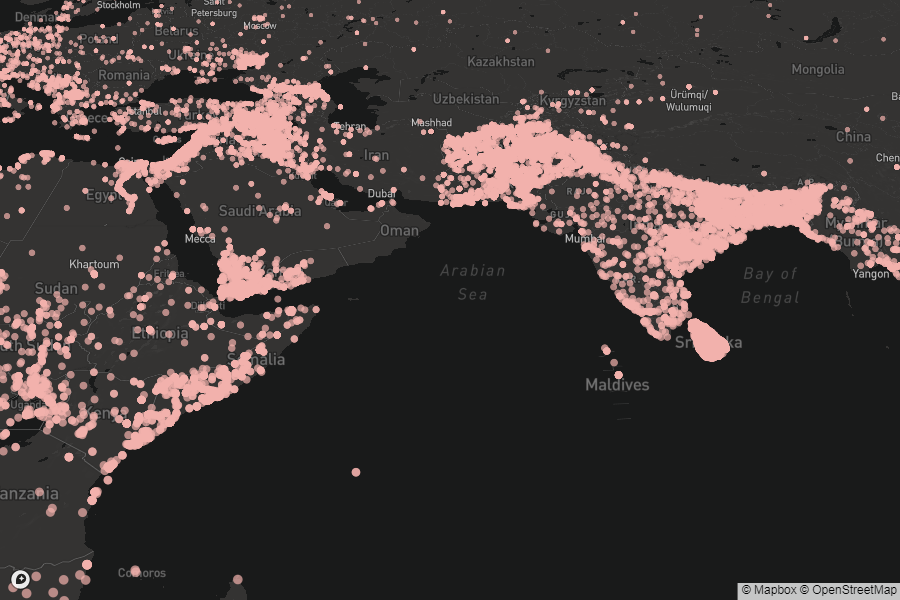

In [91]:
Image('/content/drive/My Drive/newplot_2.png', width = 900, height = 600)

In [0]:
# Let's take a look at some of the active terrorist group
# We will group by the number of attacks caused by each group with the number of casualties
# Casualties = nkill + nwound
detailed_report['ncals'] = detailed_report['nkill'] + detailed_report['nwound']

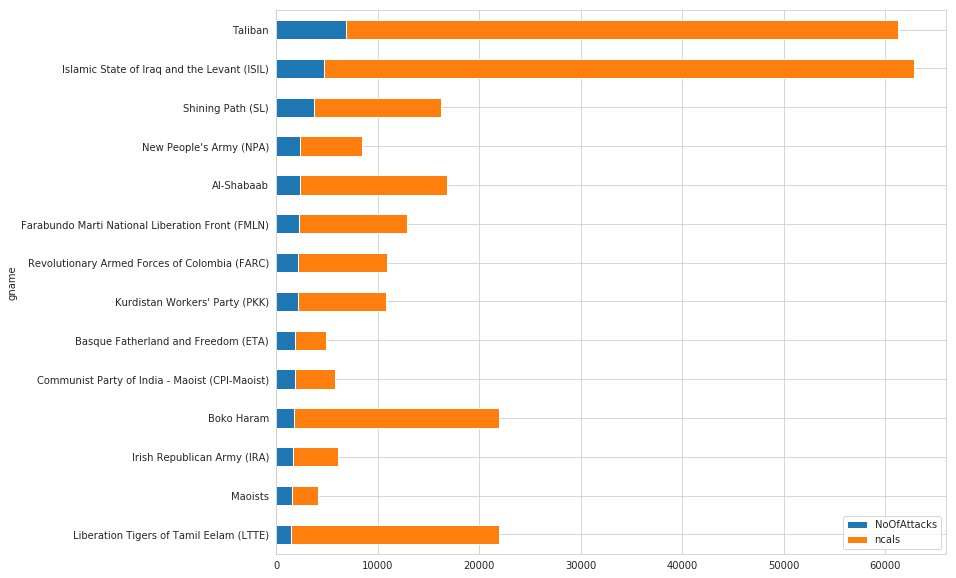

In [93]:
top15 = detailed_report[detailed_report['gname'].isin(detailed_report['gname'].value_counts()[1:15].index)]
# We only care about casualtie and group name
dataset1 = top15[['ncals','gname']].groupby('gname').sum().reset_index()
# Now we have one dataframe with only group name and ncals
# However we lack the total occurance of the group
# We will then proceed create a second dataframe with focus only on frequency of acting groups
top15_freq = detailed_report[detailed_report['gname'].isin(detailed_report['gname'].value_counts()[1:15].index)]
dataset2 = top15_freq['gname'].value_counts()\
.to_frame().reset_index().rename(columns={'index':'gname','gname':'NoOfAttacks'}).sort_values(by='NoOfAttacks')
# Now let's merge the 2 data set and blot a stacked bar
dataset3 = dataset1.merge(dataset2, on='gname').sort_values(by='NoOfAttacks')
dataset3.plot.barh(x='gname',y=['NoOfAttacks','ncals'],figsize=(12,10),stacked=True)

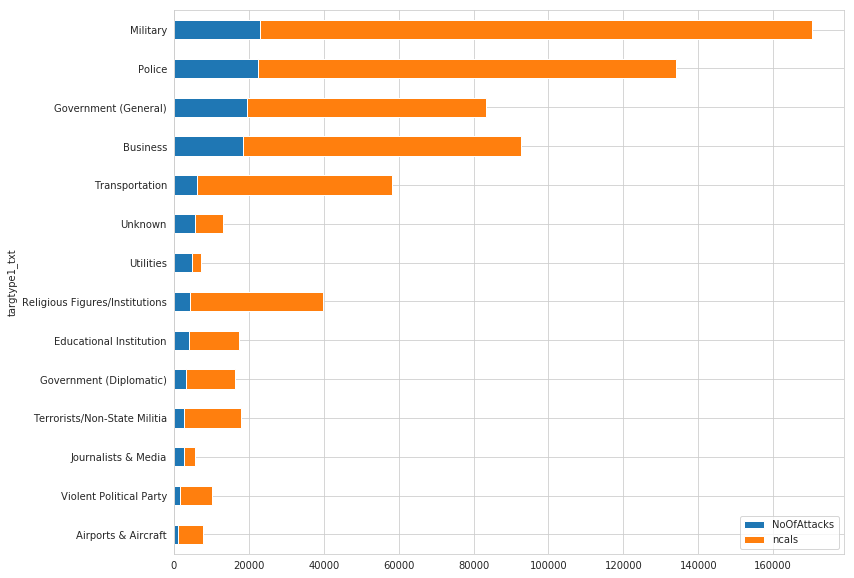

In [94]:
# We can see that that taliban and ISIL quite notorious even now from all the news
# We will also do the same to see what kind of targets terrorists want to aim at
top15 = detailed_report[detailed_report['targtype1_txt'].isin(detailed_report['targtype1_txt'].value_counts()[1:15].index)]
# We only care about casualtie and group name
dataset1 = top15[['ncals','targtype1_txt']].groupby('targtype1_txt').sum().reset_index()
# Now we have one dataframe with only group name and ncals
# However we lack the total occurance of the group
# We will then proceed create a second dataframe with focus only on frequency of acting groups
top15_freq = detailed_report[detailed_report['targtype1_txt'].isin(detailed_report['targtype1_txt'].value_counts()[1:15].index)]
dataset2 = top15_freq['targtype1_txt'].value_counts()\
.to_frame().reset_index().rename(columns={'index':'targtype1_txt','targtype1_txt':'NoOfAttacks'}).sort_values(by='NoOfAttacks')
# Now let's merge the 2 data set and blot a stacked bar
dataset3 = dataset1.merge(dataset2, on='targtype1_txt').sort_values(by='NoOfAttacks')
dataset3.plot.barh(x='targtype1_txt',y=['NoOfAttacks','ncals'],figsize=(12,10),stacked=True)

In [0]:
# Well there are more interesting fields to analyse
# But i guess we can stop it for now
# Motive is also an interesting field to analyse
# However, that require NLP knowledge and skill in using techniques, libraries like corpus ...
# So maybe another time